<a href="https://colab.research.google.com/github/MandalapuSamantha/Shadowfox/blob/main/carpriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
import math
import nltk
import pickle


In [2]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [3]:

car_data = pd.read_csv('car.csv')
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_data = pd.DataFrame(car_data)


In [5]:
car_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_data['Fuel_Type'].unique()


array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [7]:
count = car_data['Car_Name'].value_counts()
threshold = 7.5
repl = count[count <= threshold].index
print(car_data['Car_Name'].unique())


['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer'
 'Honda Activa 4G' 'TVS Sport' 'Honda Dream Yuga'
 'Bajaj Avenger Street 220' 'Hero Splender i

In [8]:
print(count)

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [9]:
car_cat = pd.get_dummies(car_data['Car_Name'].replace(repl,"Uncommmon"))


In [10]:
car_data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [11]:
car_data['Owner'].unique()

array([0, 1, 3])

In [12]:
car_data['Seller_Type'].unique()


array(['Dealer', 'Individual'], dtype=object)

In [13]:
for i in range(301):
 car_data.loc[i,['Year']] = 2023 - car_data.loc[i,['Year']]

car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,9,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,10,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,6,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,12,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,9,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,7,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,8,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,14,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,6,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [14]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:

type(car_data)

pandas.core.frame.DataFrame

In [17]:

car_data['Depreciation'] = (car_data['Present_Price'] - car_data['Selling_Price'])
# car_data['Depreciation_per_km'] = (car_data['Present_Price'] - car_data['Selli
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Depreciation
0,ritz,9,3.35,5.59,27000,Petrol,Dealer,Manual,0,2.24
1,sx4,10,4.75,9.54,43000,Diesel,Dealer,Manual,0,4.79
2,ciaz,6,7.25,9.85,6900,Petrol,Dealer,Manual,0,2.60
3,wagon r,12,2.85,4.15,5200,Petrol,Dealer,Manual,0,1.30
4,swift,9,4.60,6.87,42450,Diesel,Dealer,Manual,0,2.27
...,...,...,...,...,...,...,...,...,...,...
296,city,7,9.50,11.60,33988,Diesel,Dealer,Manual,0,2.10
297,brio,8,4.00,5.90,60000,Petrol,Dealer,Manual,0,1.90
298,city,14,3.35,11.00,87934,Petrol,Dealer,Manual,0,7.65
299,city,6,11.50,12.50,9000,Diesel,Dealer,Manual,0,1.00


In [18]:
car_data = pd.concat([car_data,car_cat], axis = 1)
car_data = pd.get_dummies(car_data, columns = ['Transmission',"Fuel_Type","Seller_Type","Owner"])
car_data.drop(columns="Car_Name", inplace=True)

In [19]:
type(car_data)

pandas.core.frame.DataFrame

In [20]:
print(car_data)

     Year  Selling_Price  Present_Price  Kms_Driven  Depreciation  Uncommmon  \
0       9           3.35           5.59       27000          2.24       True   
1      10           4.75           9.54       43000          4.79       True   
2       6           7.25           9.85        6900          2.60      False   
3      12           2.85           4.15        5200          1.30       True   
4       9           4.60           6.87       42450          2.27       True   
..    ...            ...            ...         ...           ...        ...   
296     7           9.50          11.60       33988          2.10      False   
297     8           4.00           5.90       60000          1.90      False   
298    14           3.35          11.00       87934          7.65      False   
299     6          11.50          12.50        9000          1.00      False   
300     7           5.30           5.90        5464          0.60      False   

      brio   ciaz   city  corolla altis

In [21]:
correlation_matrix = car_data.corr()
correlation_matrix['Selling_Price']


Year                     -0.236141
Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Depreciation              0.520881
Uncommmon                -0.526853
brio                      0.003058
ciaz                      0.097252
city                      0.167118
corolla altis             0.117753
fortuner                  0.538261
grand i10                 0.009198
i20                       0.003646
innova                    0.280812
verna                     0.062962
Transmission_Automatic    0.367128
Transmission_Manual      -0.367128
Fuel_Type_CNG            -0.025164
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Dealer        0.550724
Seller_Type_Individual   -0.550724
Owner_0                   0.101445
Owner_1                  -0.098318
Owner_3                  -0.024591
Name: Selling_Price, dtype: float64

array([[<Axes: xlabel='Selling_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Selling_Price'>,
        <Axes: xlabel='Depreciation', ylabel='Selling_Price'>],
       [<Axes: xlabel='Selling_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Present_Price', ylabel='Present_Price'>,
        <Axes: xlabel='Depreciation', ylabel='Present_Price'>],
       [<Axes: xlabel='Selling_Price', ylabel='Depreciation'>,
        <Axes: xlabel='Present_Price', ylabel='Depreciation'>,
        <Axes: xlabel='Depreciation', ylabel='Depreciation'>]],
      dtype=object)

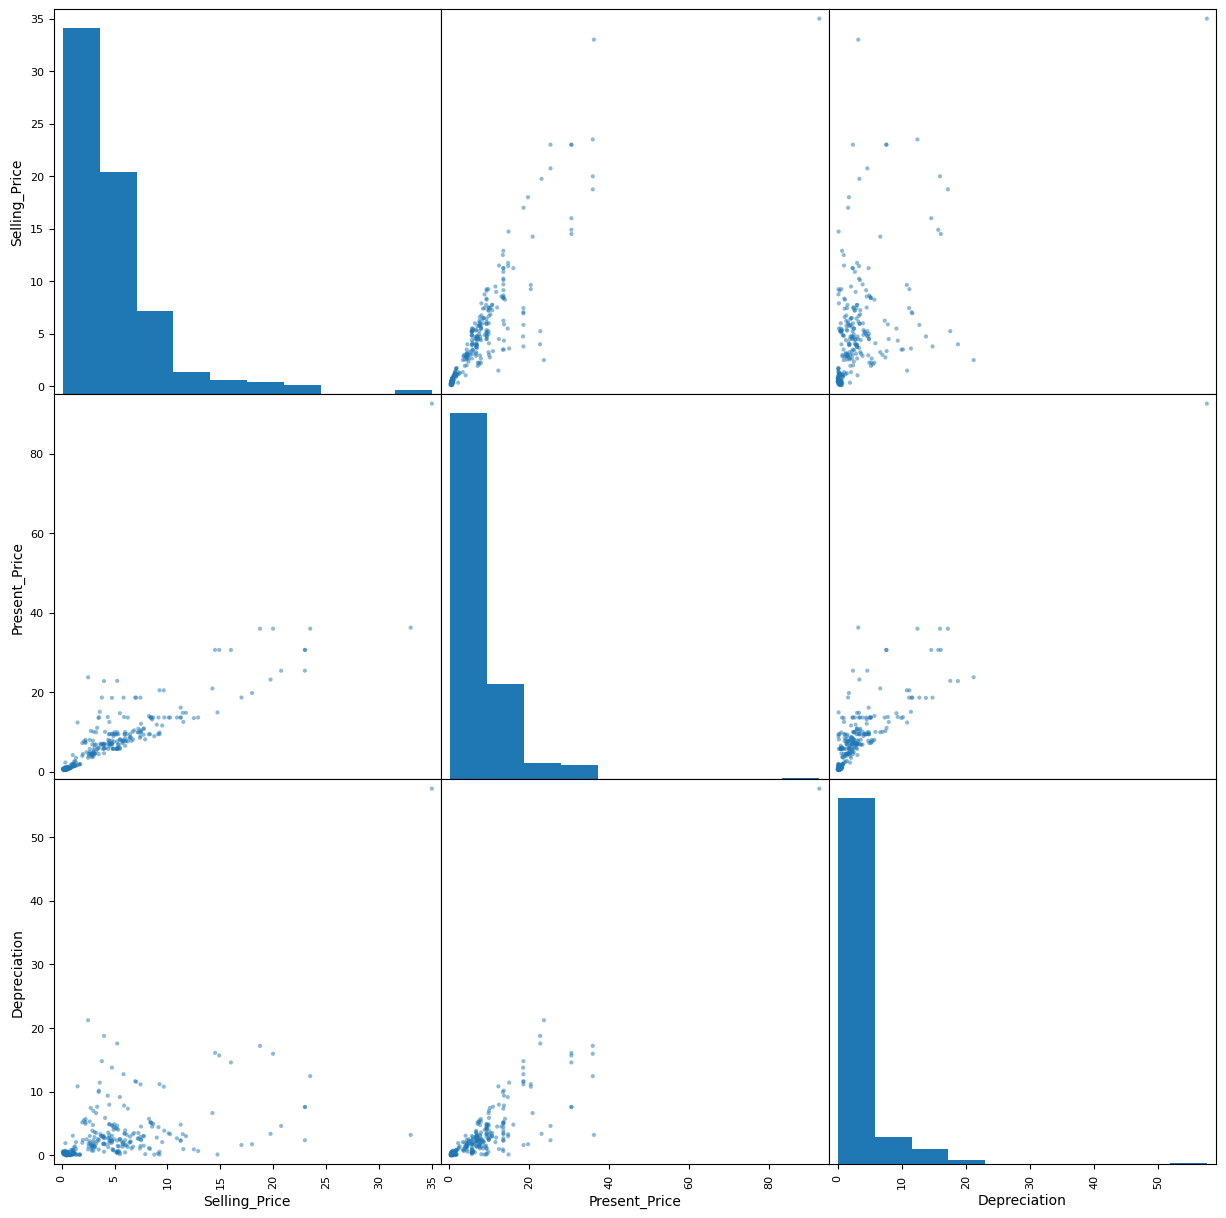

In [22]:

attributes = ['Selling_Price','Present_Price','Depreciation']
scatter_matrix(car_data[attributes],figsize=(15,15))


<Axes: xlabel='Depreciation', ylabel='Present_Price'>

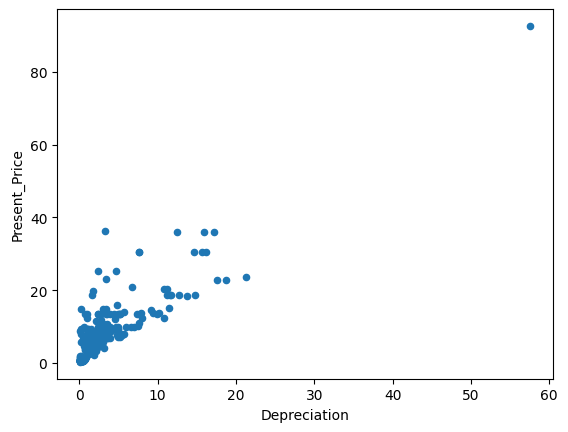

In [23]:
car_data.plot(kind='scatter',x='Depreciation',y = 'Present_Price')


In [24]:
car_data


,Year,Selling_Price,Present_Price,Kms_Driven,Depreciation,Uncommmon,brio,ciaz,city,corolla altis,...,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Owner_0,Owner_1,Owner_3
0,9,3.35,5.59,27000,2.24,True,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False
1,10,4.75,9.54,43000,4.79,True,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
2,6,7.25,9.85,6900,2.60,False,False,True,False,False,...,False,True,False,False,True,True,False,True,False,False
3,12,2.85,4.15,5200,1.30,True,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False
4,9,4.60,6.87,42450,2.27,True,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,7,9.50,11.60,33988,2.10,False,False,False,True,False,...,False,True,False,True,False,True,False,True,False,False
297,8,4.00,5.90,60000,1.90,False,True,False,False,False,...,False,True,False,False,True,True,False,True,False,False
298,14,3.35,11.00,87934,7.65,False,False,False,True,False,...,False,True,False,False,True,True,False,True,False,False
299,6,11.50,12.50,9000,1.00,False,False,False,True,False,...,False,True,False,True,False,True,False,True,False,False


In [25]:

x = car_data.drop(columns=['Selling_Price'])
x


,Year,Present_Price,Kms_Driven,Depreciation,Uncommmon,brio,ciaz,city,corolla altis,fortuner,...,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Owner_0,Owner_1,Owner_3
0,9,5.59,27000,2.24,True,False,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False
1,10,9.54,43000,4.79,True,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
2,6,9.85,6900,2.60,False,False,True,False,False,False,...,False,True,False,False,True,True,False,True,False,False
3,12,4.15,5200,1.30,True,False,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False
4,9,6.87,42450,2.27,True,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,7,11.60,33988,2.10,False,False,False,True,False,False,...,False,True,False,True,False,True,False,True,False,False
297,8,5.90,60000,1.90,False,True,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False
298,14,11.00,87934,7.65,False,False,False,True,False,False,...,False,True,False,False,True,True,False,True,False,False
299,6,12.50,9000,1.00,False,False,False,True,False,False,...,False,True,False,True,False,True,False,True,False,False


In [26]:

y = car_data.loc[:,['Selling_Price']]
y

,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60
...,...
296,9.50
297,4.00
298,3.35
299,11.50


In [27]:

x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.reset_index(drop = True, inplace = True)
x_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [28]:

x_train

,Year,Present_Price,Kms_Driven,Depreciation,Uncommmon,brio,ciaz,city,corolla altis,fortuner,...,Transmission_Automatic,Transmission_Manual,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Owner_0,Owner_1,Owner_3
0,9,7.60,77632,1.60,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
1,7,11.80,9010,2.81,False,False,False,True,False,False,...,False,True,False,False,True,True,False,True,False,False
2,11,2.69,50000,1.44,True,False,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False
3,11,9.40,71000,4.20,False,False,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
4,11,0.57,25000,0.37,True,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,10,9.90,56701,4.90,False,False,False,True,False,False,...,False,True,False,False,True,True,False,True,False,False
206,16,0.75,49000,0.55,True,False,False,False,False,False,...,False,True,False,False,True,False,True,False,True,False
207,8,1.90,14000,0.80,True,False,False,False,False,False,...,False,True,False,False,True,False,True,True,False,False
208,17,4.15,65000,3.10,True,False,False,False,False,False,...,False,True,False,False,True,True,False,True,False,False


In [30]:
model = LinearRegression()
model.fit(x_train,y_train)
y_predicted = model.predict(x_test)

In [31]:
mse_train = mean_squared_error(y_train, model.predict(x_train))
mse_train

6.667949703354024e-23

In [32]:
mse = mean_squared_error(y_test,y_predicted)
mse


5.42982557812535e-23

In [33]:
rmse = math.sqrt(mse)
rmse


7.368735019068978e-12

In [34]:

mae = mean_absolute_error(y_test, y_predicted)
mae

5.816647529932972e-12

In [35]:

mae_train = mean_absolute_error(y_train, model.predict(x_train))
mae_train


6.3832968011907845e-12

In [36]:
score = model.score(x_test,y_test)
score


1.0

In [37]:
u = ((y_test - y_predicted)**2).sum()
v = ((y-y_test.mean())**2).sum()
score = 1-(u/v)
print(score)

Selling_Price    1.0
dtype: float64


In [38]:
score_train = model.score(x_train,y_train)
score_train

1.0